In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração da máquina (MacBook Pro M3 2023)

* Quantidade total de núcleos: 12
* Quantidade total de threads: 12



# Informações sobre os dados na tabela

* Quantidade de threads (Em que 0 signfica sequencial)
* Dimensões das matrizes
* Tempo de inicialização
* Tempo de processamento (apenas multiplicação de matriz)
* Tempo de finalização



In [30]:
# Carrega o arquivo com tempos de execução
# OBS/TODO: Ver de trocar termo "threads" por "processos"
nomes_das_colunas = ['Quantidade de threads', 'Quantidade de Pontos', "Tempo de Processamento"]
df = pd.read_csv("./log_execucao_kmeans.csv", header=None, names=nomes_das_colunas)
df

,Quantidade de threads,Quantidade de Pontos,Tempo de Processamento
0,0,500,0.02876
1,0,500,0.02912
2,0,500,0.02928
3,0,500,0.03102
4,0,500,0.03057
...,...,...,...
95,8,100000,31.84542
96,8,100000,30.05088
97,8,100000,30.64461
98,8,100000,32.15243


# Médias dos tempos de execução(em segundos) para as threads e as dimensões
### OBS.: Quantidade de threads 0 faz referencia ao sequencial

In [31]:
df_medias = df.groupby(["Quantidade de threads", "Quantidade de Pontos"]).median()
df_medias

Tempo de Processamento
Quantidade de threads Quantidade de Pontos                        
0                     500                                  0.02928
                      1000                                 0.06841
                      10000                                0.97358
                      100000                              12.72953
1                     500                                  0.55708
                      1000                                 0.65482
                      10000                                2.80768
                      100000                              30.54603
2                     500                                  0.62923
                      1000                                 0.67381
                      10000                                2.87316
                      100000                              29.49777
4                     500                                  0.56383
                      1000                                 0.65634
                      10000                                2.76615
                      100000                              30.22667
8                     500                                  0.56911
                      1000                                 0.61685
                      10000                                2.77451
                      100000                              31.59872

# Graficos

### Aceleração

In [32]:
# Função para calcular a aceleração
def calc_aceleracao(row):
    dim = row.name[1]
    return df_medias.loc[0, dim]["Tempo de Processamento"] / row["Tempo de Processamento"]

# Aplicar a função de aceleração para todas as combinações de Threads e Dim (exceto sequencial)
df_medias['Aceleracao'] = df_medias.apply(calc_aceleracao, axis=1)

In [34]:
df_medias

Tempo de Processamento  Aceleracao
Quantidade de threads Quantidade de Pontos                                    
0                     500                                  0.02928    1.000000
                      1000                                 0.06841    1.000000
                      10000                                0.97358    1.000000
                      100000                              12.72953    1.000000
1                     500                                  0.55708    0.052560
                      1000                                 0.65482    0.104471
                      10000                                2.80768    0.346756
                      100000                              30.54603    0.416733
2                     500                                  0.62923    0.046533
                      1000                                 0.67381    0.101527
                      10000                                2.87316    0.338853
                      100000                              29.49777    0.431542
4                     500                                  0.56383    0.051931
                      1000                                 0.65634    0.104230
                      10000                                2.76615    0.351962
                      100000                              30.22667    0.421136
8                     500                                  0.56911    0.051449
                      1000                                 0.61685    0.110902
                      10000                                2.77451    0.350902
                      100000                              31.59872    0.402850

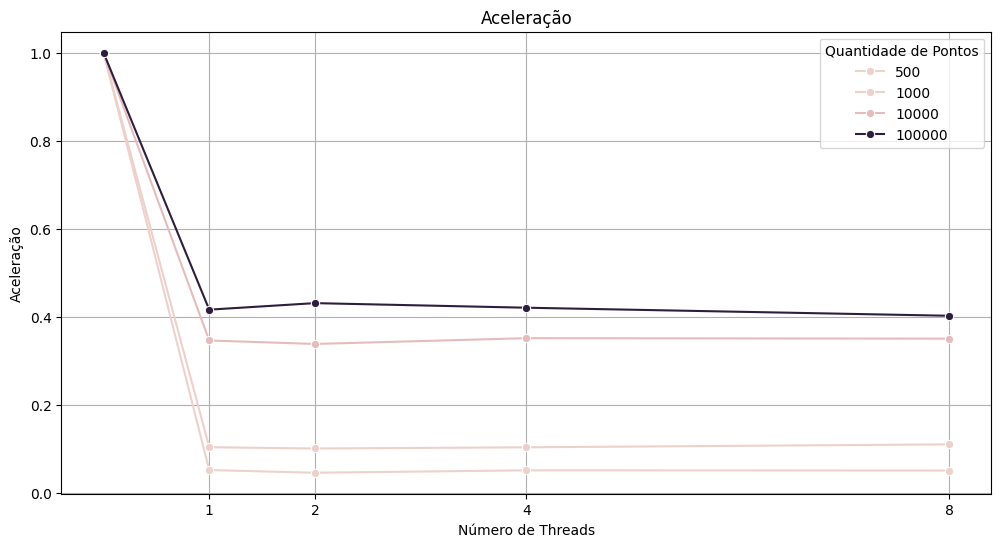

In [36]:
# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de threads', y='Aceleracao', hue='Quantidade de Pontos', marker='o')

# Configurações do gráfico
plt.title('Aceleração')
plt.xlabel('Número de Threads')
plt.ylabel('Aceleração')
plt.grid(True)
plt.xticks([1, 2, 4, 8])
plt.show()

### Eficiência

In [37]:
# Função para calcular a eficiência
def calc_efic(row):
    th = row.name[0]
    if th == 0:
        return 1
    return row["Aceleracao"] / th

In [38]:
# Aplicar a função de eficiência
df_medias['Eficiencia'] = df_medias.apply(calc_efic, axis=1)

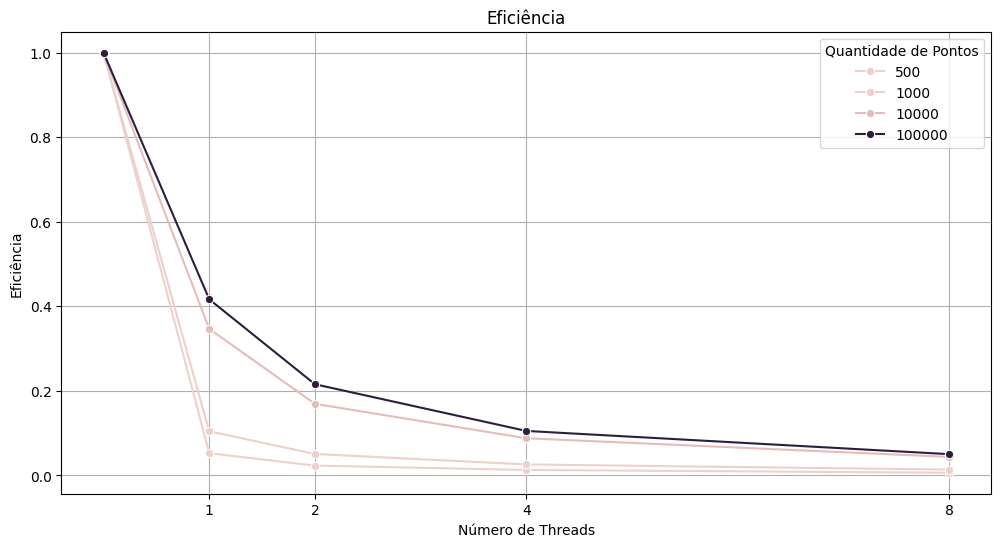

In [39]:
# Criar o gráfico de linhas com o Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de threads', y='Eficiencia', hue='Quantidade de Pontos', marker='o')

# Configurações do gráfico
plt.title('Eficiência')
plt.xlabel('Número de Threads')
plt.ylabel('Eficiência')
plt.grid(True)
plt.xticks([1, 2, 4, 8])
plt.show()